In [1]:
# First need to import dataset from Github
# Import needed libraries to get data from URL and load into Pandas DF
import os
import tarfile
import urllib
import pandas as pd

# Define url and OS path that I want to save csv data under
DATA_URL = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/heart-train.csv"
DATA_URL_TEST = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/heart-test.csv"
DATA_URL_WHOLE = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/heart-complete.csv"
DATA_PATH = os.path.join("/Users/Do-While/Desktop/SJSU/Classes/SJSU/Fall 2020", "DataSets")

# Function to get data from URL and return it as Pandas dataframe
def fetch_and_load_from_url(data_url, data_path, txt_file_name):
    
    # If no data path exists, create directory
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    # create text document path under OS path
    txt_path = os.path.join(data_path, txt_file_name)
    # Using URL, request data and return to created path
    urllib.request.urlretrieve(data_url, txt_path)
    # Read in text file, convert csv to pandas df and return upon close of file
    with open(txt_path, "r") as file:
        return pd.read_csv(file)

# Creating 3 separate dataframes
heart_train_df = fetch_and_load_from_url(DATA_URL, DATA_PATH, "heart_train.txt")
heart_test_df = fetch_and_load_from_url(DATA_URL_TEST, DATA_PATH, "heart_test.txt")
heart_complete_df = fetch_and_load_from_url(DATA_URL_WHOLE, DATA_PATH, "heart_complete.txt")


In [2]:
heart_complete_df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


### 1. Identify dataset columns into categories

In [3]:
# Using df.dypes to get an idea
print(heart_complete_df.dtypes)
# Categorical
# Nominal columns = [famhist, chd]
# Ordinal = []
# 
# Continuous
# Interval = []
# Ratio = [sbp, ldl, adiposity, alcohol, tobacco, obesity, age, typea]

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object


### 2. Use df.info and df.describe to get insights

In [4]:
print(heart_complete_df.info())
print(heart_complete_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB
None
              sbp     tobacco         ldl   adiposity       typea     obesity  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean   138.326840    3.635649    4.740325   25.406732   53.103896   26.044113   
std     20.496317    4.593024    2.070909    7.780699    9.817534    4.213680   
min    101.000000    0.

### 3. Find number of null values for each column

In [5]:
# Checking each column to see if null and getting the sum of null values in the rows (axis=0)
heart_complete_df.isnull().sum(axis=0)

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

### 4. Know about the patients

In [6]:
# A) Find the oldest person

# Using max() function on 'age' column
print("Oldest person age: ", heart_complete_df["age"].max())

Oldest person age:  64


In [7]:
# B) Find the youngest person

# Using min() function on 'age' column
print("Youngest person age: ", heart_complete_df["age"].min())

Youngest person age:  15


In [8]:
# C) Find the average age of the group

# Using mean() function on 'age' column
print("Average age of group: ", heart_complete_df["age"].mean())

Average age of group:  42.816017316017316


In [9]:
# D) Find the median age of the group

# Using median() function on 'age' column
print("Median age of group: ", heart_complete_df["age"].median())

Median age of group:  45.0


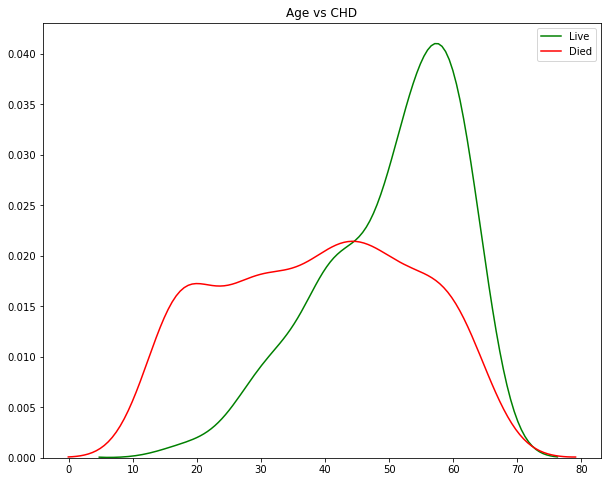

In [10]:
# E) Find the relationship between the deaths and ages
import seaborn as sns
import matplotlib.pyplot as plt

# Splitting data into those that are alive and dead for age
age_alive = heart_complete_df.age[heart_complete_df["chd"] == 1]
age_dead = heart_complete_df.age[heart_complete_df["chd"] == 0]

# Using kdeplot from seaborns
plt.figure(figsize=(10,8))

sns.kdeplot(age_alive, color="green")

sns.kdeplot(age_dead, color="red")
plt.legend(["Live", "Died"])
plt.title("Age vs CHD")
plt.show()

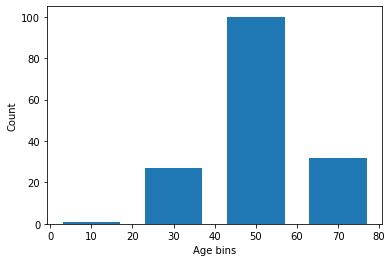

In [11]:
# F) Find age groups whose survival rate is the largest

# Selecting bins to coincide with max age of 64
# Bins go from age ranges of [0-20) [20 - 40) [40 - 60) [60 - 80]
bins = [0, 20, 40, 60, 80]

plt.hist(age_alive, bins=bins, rwidth=.7)
plt.xlabel('Age bins')
plt.ylabel("Count")
plt.show()

# Largest age group is between 40 and 60 years old

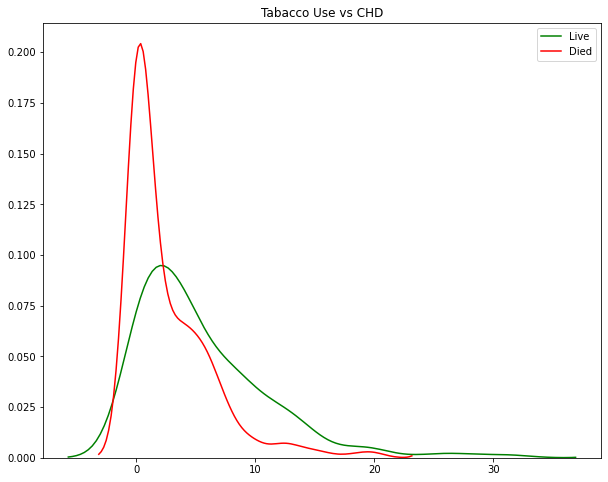

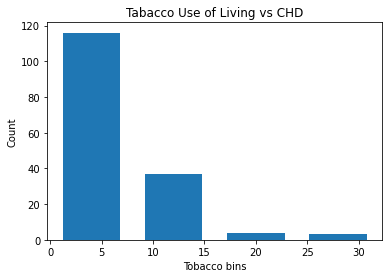

In [12]:
# G) Find similar relationships for at least 3-4 columns that I think can play a role

# Looking at Tobacco first

# Splitting data into those that are alive and dead
age_alive_tobacco = heart_complete_df.tobacco[heart_complete_df["chd"] == 1]
age_dead_tobacco = heart_complete_df.tobacco[heart_complete_df["chd"] == 0]

# Using kdeplot from seaborns
plt.figure(figsize=(10,8))

sns.kdeplot(age_alive_tobacco, color="green")

sns.kdeplot(age_dead_tobacco, color="red")
plt.legend(["Live", "Died"])
plt.title("Tabacco Use vs CHD")
plt.show()

# Getting bins of tobacco use
# Selecting bins to coincide with max tobacco use of 31.2

bins = [0, 8, 16, 24, 32]

plt.hist(age_alive_tobacco, bins=bins, rwidth=.7)
plt.xlabel('Tobacco bins')
plt.ylabel("Count")
plt.title("Tabacco Use of Living vs CHD")
plt.show()


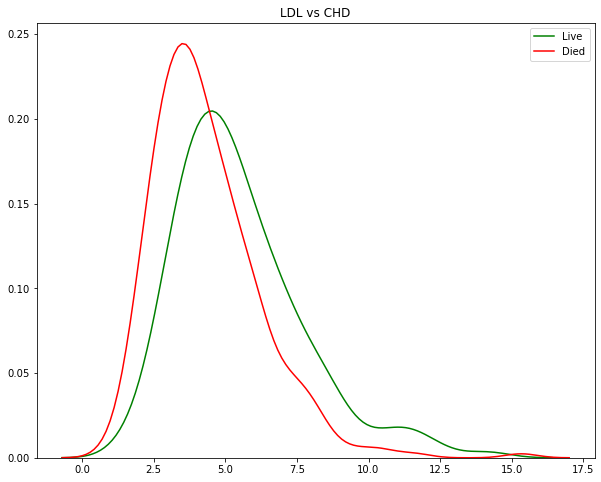

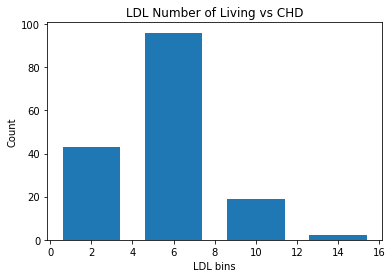

In [13]:
# G) Continued

# Looking at ldl

# Splitting data into those that are alive and dead
age_alive_ldl = heart_complete_df.ldl[heart_complete_df["chd"] == 1]
age_dead_ldl = heart_complete_df.ldl[heart_complete_df["chd"] == 0]

# Using kdeplot from seaborns
plt.figure(figsize=(10,8))

sns.kdeplot(age_alive_ldl, color="green")

sns.kdeplot(age_dead_ldl, color="red")
plt.legend(["Live", "Died"])
plt.title("LDL vs CHD")
plt.show()

# Getting bins of ldl use
# Selecting bins to coincide with max LDL use of 15.3

bins = [0, 4, 8, 12, 16]

plt.hist(age_alive_ldl, bins=bins, rwidth=.7)
plt.xlabel('LDL bins')
plt.ylabel("Count")
plt.title("LDL Number of Living vs CHD")
plt.show()
# LDL seems to have a smaller relationship to alive or dead. Both closely related.

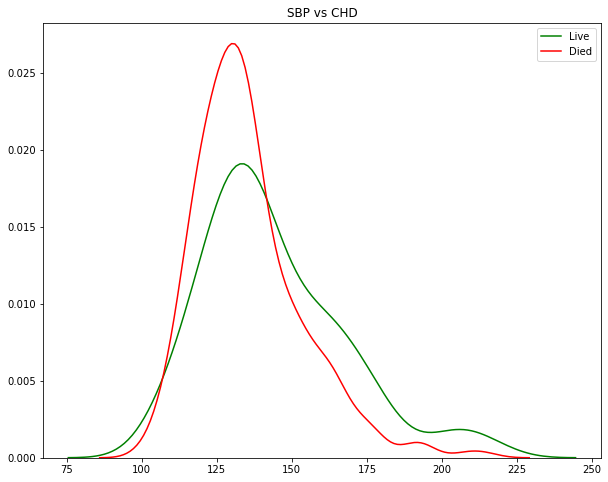

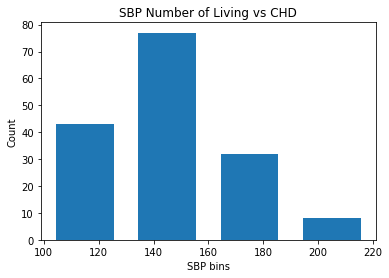

In [14]:
# Looking at sbp

# Splitting data into those that are alive and dead
age_alive_sbp = heart_complete_df.sbp[heart_complete_df["chd"] == 1]
age_dead_sbp = heart_complete_df.sbp[heart_complete_df["chd"] == 0]

# Using kdeplot from seaborns
plt.figure(figsize=(10,8))

sns.kdeplot(age_alive_sbp, color="green")

sns.kdeplot(age_dead_sbp, color="red")
plt.legend(["Live", "Died"])
plt.title("SBP vs CHD")
plt.show()

# Getting bins of SBP use
# Selecting bins to coincide with max sbp of 218

bins = [100, 130, 160, 190, 220]

plt.hist(age_alive_sbp, bins=bins, rwidth=.7)
plt.xlabel('SBP bins')
plt.ylabel("Count")
plt.title("SBP Number of Living vs CHD")
plt.show()
# Doesn't seem to be that big of a relationship here but still there is something to go off of.

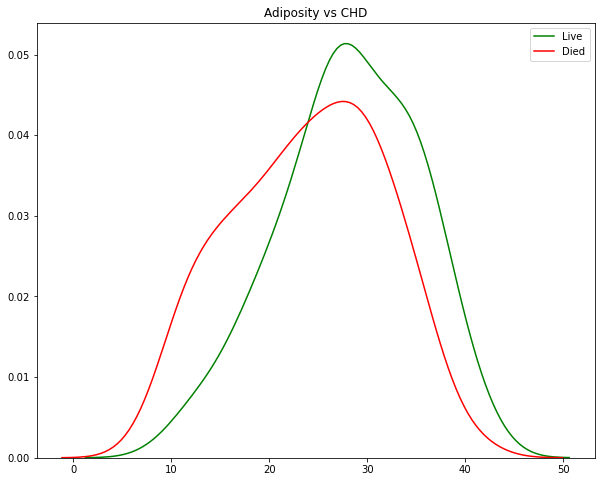

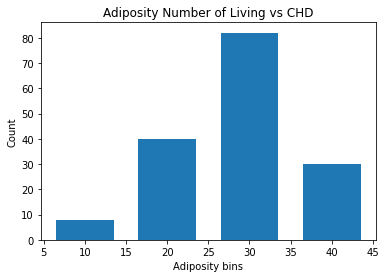

In [15]:
# Looking at adiposity

# Splitting data into those that are alive and dead
age_alive_adiposity = heart_complete_df.adiposity[heart_complete_df["chd"] == 1]
age_dead_adiposity = heart_complete_df.adiposity[heart_complete_df["chd"] == 0]

# Using kdeplot from seaborns
plt.figure(figsize=(10,8))

sns.kdeplot(age_alive_adiposity, color="green")

sns.kdeplot(age_dead_adiposity, color="red")
plt.legend(["Live", "Died"])
plt.title("Adiposity vs CHD")
plt.show()

# Getting bins of adiposity use
# Selecting bins to coincide with max adiposity of 42.49

bins = [5, 15, 25, 35, 45]

plt.hist(age_alive_adiposity, bins=bins, rwidth=.7)
plt.xlabel('Adiposity bins')
plt.ylabel("Count")
plt.title("Adiposity Number of Living vs CHD")
plt.show()
# Smaller relationship but still a difference between the alive and dead to be considered worthwhile checking out

#### H. Get more visuals on data distributions

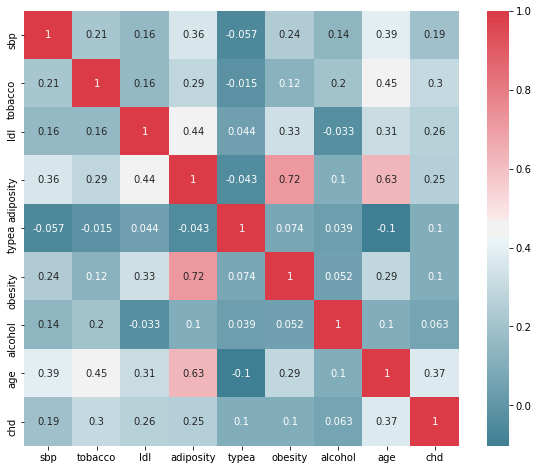

In [16]:
# i) Use plotCorrelationMatrix

# Creating figure and axis
fig, ax = plt.subplots(figsize=(10,8))
# Plotting correlation matrix as a heatmap for better visualization of results
sns.heatmap(heart_complete_df.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C64E1DBCA0>,
      dtype=object)

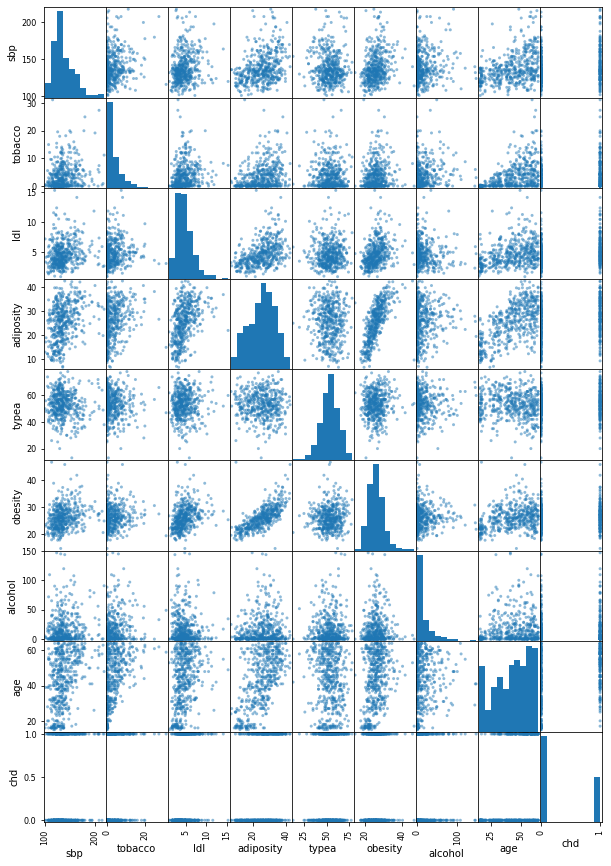

In [17]:
# ii) Plotting scatter matrix
# Using built-in Pandas function

pd.plotting.scatter_matrix(heart_complete_df, figsize=(10,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6507F2580>,
      dtype=object)

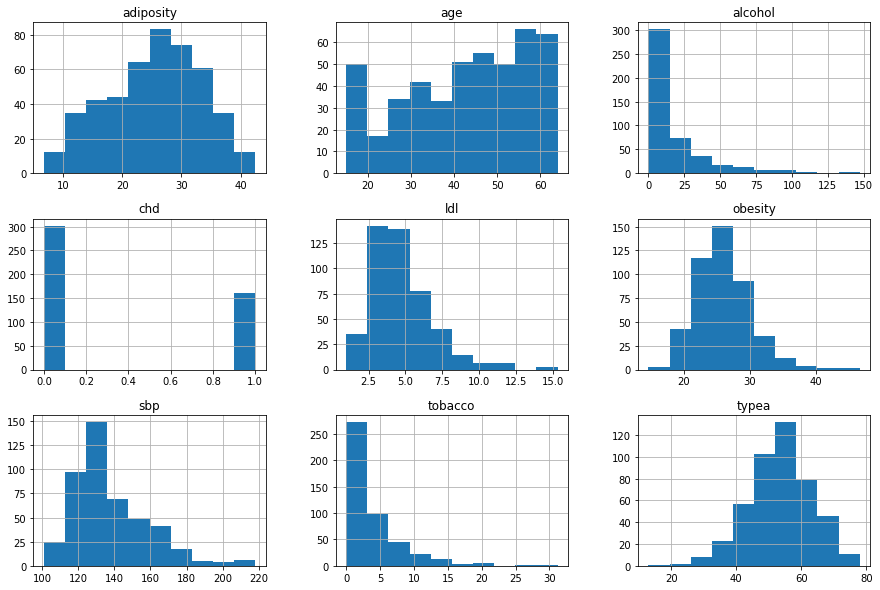

In [18]:
# iii) Plot per column distribution

heart_complete_df.hist(figsize=(15,10))

#### I. Find missing values

In [19]:
# i) Get the count of missing values

# Getting total missing values 'NaN' from all columns and getting sum of each column's number
print("Total missing values in DF: ", heart_complete_df.isnull().sum().sum())

Total missing values in DF:  0


In [20]:
# i) Plot a heat map for the missing values
# There are no missing values so no heatmap can be plotted

#### J. Apply techniques to handle missing values
Since there are no missing values in the dataset, imputation on the dataset is not needed

#### K. Apply the feature scaling technique if I think it is required (will revisit if needed)

#### L. Applying the regression models that I think is most suited for this problem.

In [22]:
# Splitting training data into features and target
x_train = heart_train_df.iloc[:,0:9]
y_train = heart_train_df.iloc[:,9]

# Also splitting testing data into features and target
x_test = heart_test_df.iloc[:,1:]

# Creating separate split since need to modify test data
x_test_reg = heart_test_df.iloc[:,1:]



##### First attempt will be Logistic Regression

In [127]:
# import logistic regression library and preprocessing to get data into needed format for regression model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing


# Need to do column preprocessing so that can use model
# Converting column to String so that can perform label encoding
x_train["famhist"] = x_train["famhist"].astype(str)
x_test_reg["famhist"] = x_test_reg["famhist"].astype(str)

# Doing label encoding so that model can have its float values

# Creating label encoding object
label_encoder = preprocessing.LabelEncoder()

# Selecting column to be transformed
famhist_data = x_train["famhist"]
famhist_test_data = x_test_reg["famhist"]

# Fitting and transforming string values to unique ints based on their current value
famhist_trans = label_encoder.fit_transform(famhist_data)
famhist_test_trans = label_encoder.fit_transform(famhist_test_data)

# Adding transformed array in place of original data
x_train["famhist"] = famhist_trans
x_test_reg["famhist"] = famhist_test_trans


logistic = LogisticRegression(max_iter=1000)

logistic.fit(x_train, y_train)

y_predict = logistic.predict(x_test_reg)

#### Getting results formatted and saving to csv for kaggle

In [24]:
import numpy as np

array_ID = np.arange(1,144)
data = {'ID' : array_ID, 'chd' : y_predict}

reg_df = pd.DataFrame(data=data)
reg_df.to_csv('regression_model.csv', index=False)

# (SPACE for more models to test)

In [128]:
y_predict

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

### M. One model used is implementation using NumPy

### Test Binary Classify

In [110]:
from torch.utils.data import Dataset, DataLoader

## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(x_train.values), 
                       torch.FloatTensor(y_train.values))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(x_test_reg.values))

In [112]:
train_loader = DataLoader(dataset=train_data, batch_size=5, shuffle=True)

test_loader = DataLoader(dataset=test_data, batch_size=1)

In [120]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(9, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [121]:
model = binaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=.001)

binaryClassification(
  (layer_1): Linear(in_features=9, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [122]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [123]:
model.train()
for e in range(1, 50+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.66400 | Acc: 60.843
Epoch 002: | Loss: 0.60023 | Acc: 66.024
Epoch 003: | Loss: 0.59326 | Acc: 67.952
Epoch 004: | Loss: 0.60187 | Acc: 66.988
Epoch 005: | Loss: 0.58276 | Acc: 67.952
Epoch 006: | Loss: 0.55536 | Acc: 71.325
Epoch 007: | Loss: 0.56502 | Acc: 70.843
Epoch 008: | Loss: 0.59805 | Acc: 64.578
Epoch 009: | Loss: 0.55720 | Acc: 69.157
Epoch 010: | Loss: 0.56458 | Acc: 69.880
Epoch 011: | Loss: 0.54386 | Acc: 69.398
Epoch 012: | Loss: 0.55496 | Acc: 72.410
Epoch 013: | Loss: 0.57276 | Acc: 69.880
Epoch 014: | Loss: 0.57391 | Acc: 70.000
Epoch 015: | Loss: 0.54368 | Acc: 71.566
Epoch 016: | Loss: 0.57078 | Acc: 70.120
Epoch 017: | Loss: 0.53385 | Acc: 74.940
Epoch 018: | Loss: 0.51269 | Acc: 72.892
Epoch 019: | Loss: 0.55289 | Acc: 73.494
Epoch 020: | Loss: 0.54777 | Acc: 70.482
Epoch 021: | Loss: 0.55485 | Acc: 72.771
Epoch 022: | Loss: 0.53317 | Acc: 72.892
Epoch 023: | Loss: 0.54145 | Acc: 73.614
Epoch 024: | Loss: 0.56226 | Acc: 69.518
Epoch 025: | Los

In [124]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [133]:
y_pred_list = [ int(x) for x in y_pred_list ]

In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predict, y_pred_list)

array([[109,   4],
       [ 14,  16]], dtype=int64)

In [135]:
array_ID = np.arange(1,144)
data = {'ID' : array_ID, 'chd' : y_pred_list}

pyTorch_df = pd.DataFrame(data=data)
pyTorch_df.to_csv('pytorch_model.csv', index=False)



# Credit to https://towardsdatascience.com/pytorch-tabular-binary-classification-a0368da5bb89

### End Test Binary Classify